# Homework

### Q1 

What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

### Q2

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q3 

Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

# Homework Answers

### Q1

\begin{equation}P(pass | quick)=\frac{P(quick | pass)\cdot P(pass)}{P(quick)}=\frac{P(quick|pass)\cdot P(pass)}{P(quick|pass)\cdot P(pass)+P(quick|fail)\cdot P(fail)}\end{equation}

\begin{equation}\therefore P(pass|quick)=\frac{0.6\cdot 0.9}{0.6\cdot0.9+0.3\cdot0.1}\approx0.947368\end{equation}

### Q2


\begin{equation}\text{Prior:}\ \\p(\theta|\alpha)=c*\theta_1^{\alpha_1-1}*\cdots*\theta_k^{\alpha_k-1}\end{equation}

\begin{equation}\text{Likelihood:}\ \\p(x|\theta,n)=c_1*\theta_1^{x_i}*\cdots*\theta_k^{x_k}\end{equation}

\begin{equation}\text{Posterior:}\ \\p(\theta|x,n,\alpha)\propto p(\theta|\alpha)*p(x|\theta,n)\end{equation}

To obtain a sufficient form of the posterior, we can ignore the normalizing constants and only consider the kernels:

\begin{equation}p(\theta|x,n,\alpha)\propto(\theta_1^{x_1}*\theta_1^{\alpha_1-1})*\cdots*(\theta_k^{x_k}*\theta_1^{\alpha_k-1})=\theta_1^{x_1+\alpha_1-1}*\cdots*\theta_k^{x_k+\alpha_k-1}\end{equation}

\begin{equation}\text{Therefore, our posterior is: }p(\theta|x,n,\alpha)=\frac1c*\theta_1^{x_1+\alpha_1-1}*\cdots*\theta_k^{x_k+\alpha_k-1}\end{equation}

It can be seen that the posterior in this case follows a Dirichlet distribution with new parameters $x_1+\alpha_1,\dots,x_k+\alpha_k$.
### Q3

In [1]:
import numpy as numpy
from scipy import stats
from scipy.stats import multinomial, dirichlet
import plotly.figure_factory as figurefactory
import matplotlib.pyplot as pyplot

In [2]:
numpy.random.seed(1008507661)

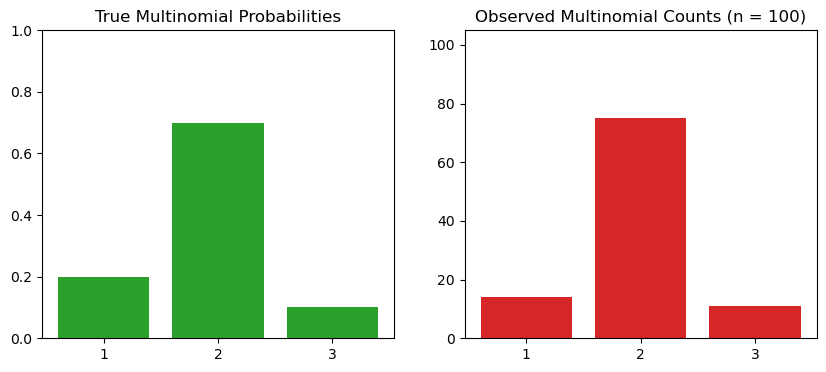

In [3]:
## Multinomial Distribution and Multinomial Samples ##

p = numpy.array([0.2, 0.7, 0.1])
n = 100

multinomial_counts = multinomial.rvs(n = n, p = p, size = 1)[0]

fig, ax = pyplot.subplots(1, 2, figsize = (10, 4))

## True Multinomial Probabilities ##
categories = ['1', '2', '3']
ax[0].bar(categories, p, color = 'C2')
ax[0].set_ylim(0, 1)
ax[0].set_title("True Multinomial Probabilities")

## Observed Multinomial Counts ##
categories = ['1', '2', '3']
ax[1].bar(categories, multinomial_counts, color = 'C3')
ax[1].set_ylim(0, n)
ax[1].set_title("Observed Multinomial Counts (n = 100)")

pyplot.show()

In [4]:
alpha = numpy.array([1.5, 1.5, 1.5])
prior = dirichlet(alpha)

## Grid Construction ##
p1 = numpy.linspace(0, 1, 100)
p2 = 1 - p1.copy()

p_ = numpy.linspace(0, 1, 100)
p1 = (p1[numpy.newaxis,:] * p_[:, numpy.newaxis]).flatten()
p2 = (p2[numpy.newaxis,:] * p_[:,numpy.newaxis]).flatten()
p3 = 1 - p1 - p2

p = numpy.c_[p1, p2, p3]

## Prior ##
prior_pdf = prior.pdf(p.T)

figure_prior = figurefactory.create_ternary_contour(
    p.T,
    prior_pdf,
    pole_labels = ['p1', 'p2', 'p3'],
    interp_mode = 'cartesian',
    showscale = True
)

figure_prior.update_layout(title = 'Dirichlet Prior')

## Posterior ##
alpha_posterior = alpha + multinomial_counts
posterior = dirichlet(alpha_posterior)

posterior_pdf = posterior.pdf(p.T)

figure_posterior = figurefactory.create_ternary_contour(
    p.T,
    posterior_pdf,
    pole_labels = ['p1', 'p2', 'p3'],
    interp_mode = 'cartesian',
    showscale = True
)

figure_posterior.update_layout(title = 'Dirichlet Posterior')
_ = figure_posterior

In [5]:
!pip install -U kaleido
from IPython.display import Image
import plotly.io as plotly

plotly.kaleido.scope.default_format = "png"

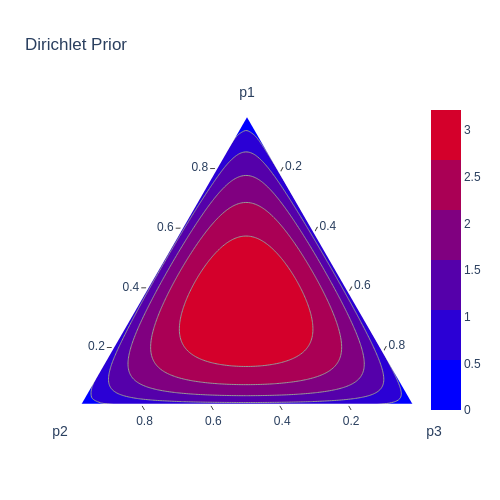

In [6]:
figure_prior.write_image("figure_prior.png")
Image("figure_prior.png")

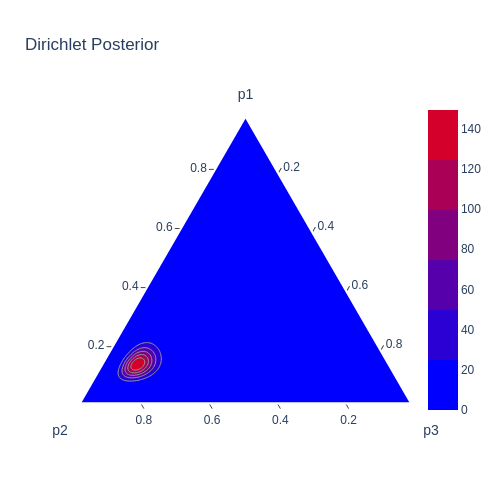

In [7]:
figure_posterior.write_image("figure_posterior.png")
Image("figure_posterior.png")